In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from zoology.analysis.utils import fetch_wandb_runs
from zoology.analysis.d_model import plot

In [6]:
df = fetch_wandb_runs(
    launch_id=[
        "default-2023-10-25-22-20-38", 
        "default-2023-10-26-19-09-31",
        "default-2023-10-27-04-13-56",
        # "default-2023-10-27-16-27-20",
        # "default-2023-10-27-17-13-00"
        # "default-2023-10-28-01-11-39"
        # "default-2023-10-28-01-28-55",
        # "default-2023-10-28-20-42-26"
        # "default-2023-10-29-05-25-38",
        "default-2023-10-29-17-31-26",
        # "default-2023-11-10-22-10-21", # h3
        # "default-2023-11-11-01-21-23"
        # "default-2023-11-11-17-26-23"
        # "default-2023-11-11-00-44-03"
        # "default-2023-11-11-20-47-43"
        "default-2023-11-12-00-31-44",
        # "default-2023-11-12-20-29-34",
        "default-2023-11-13-00-31-15",
        "default-2023-11-13-00-42-27"
    ], 
    project_name="zoology"
)

In [7]:
plot_df = df.groupby([
    "model.sequence_mixer.name",
    "model.d_model",
    "data.input_seq_len",
])["valid/accuracy"].max().reset_index()

In [8]:
df["data.input_seq_len"] = df["data.input_seq_len"].fillna(df["data.0.input_seq_len"])

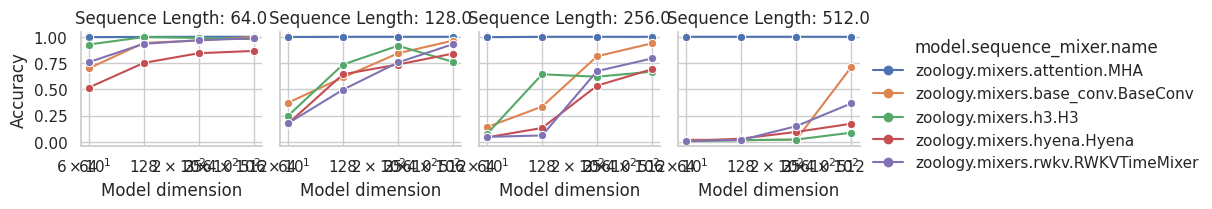

In [9]:
plot(df)

In [42]:
np.logspace(-3.3, -2, 4)

array([0.00050119, 0.00135936, 0.00368695, 0.01      ])

In [ ]:
from zoology.mixers.selective import SelectiveLookups

In [41]:
import torch 

x = torch.randn(10) * 10
x = torch.concat([x] * 5)
torch.softmax(x, dim=-1)

tensor([2.6296e-15, 3.8798e-11, 4.8660e-11, 1.0174e-07, 3.3495e-10, 2.5289e-14,
        1.1940e-15, 2.0000e-01, 3.6621e-18, 9.0310e-14, 2.6296e-15, 3.8798e-11,
        4.8660e-11, 1.0174e-07, 3.3495e-10, 2.5289e-14, 1.1940e-15, 2.0000e-01,
        3.6621e-18, 9.0310e-14, 2.6296e-15, 3.8798e-11, 4.8660e-11, 1.0174e-07,
        3.3495e-10, 2.5289e-14, 1.1940e-15, 2.0000e-01, 3.6621e-18, 9.0310e-14,
        2.6296e-15, 3.8798e-11, 4.8660e-11, 1.0174e-07, 3.3495e-10, 2.5289e-14,
        1.1940e-15, 2.0000e-01, 3.6621e-18, 9.0310e-14, 2.6296e-15, 3.8798e-11,
        4.8660e-11, 1.0174e-07, 3.3495e-10, 2.5289e-14, 1.1940e-15, 2.0000e-01,
        3.6621e-18, 9.0310e-14])

In [45]:
np.histogram(x.numpy(), bins=100)

(array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0,
        5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0,
        0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]),
 array([-9.064611  , -8.679221  , -8.293831  , -7.90844   , -7.52305   ,
        -7.137659  , -6.752269  , -6.366878  , -5.9814878 , -5.5960975 ,
        -5.2107067 , -4.8253164 , -4.439926  , -4.0545354 , -3.669145  ,
        -3.2837546 , -2.898364  , -2.5129738 , -2.1275833 , -1.7421929 ,
        -1.3568023 , -0.97141194, -0.5860215 , -0.20063101,  0.18475944,
         0.5701499 ,  0.95554036,  1.3409308 ,  1.7263212 ,  2.1117117 ,
         2.4971023 ,  2.8824925 ,  3.267883  ,  3.6532736 ,  4.038664  ,
         4.4240546 ,  4.809445  ,  5.194835  ,  5.580226  ,  5.965616  ,
         6.3510065 ,  6.7363973 ,  7.1217875 ,  7.507178  ,  7.8925686 ,
 

In [101]:

results = []
for seqlen in [64, 128, 256, 512, 1024]:
    x = torch.randn(seqlen) * torch.log([seqlen], base=2)
    for i in range(1000):
        results.append(
            {
                "max": torch.softmax(x / (i + 1), dim=-1).max().item(),
                "tmp": i,
                "seqlen": seqlen
            }
        )
sns.lineplot(data=pd.DataFrame(results), x="tmp", y="max", hue="seqlen")

TypeError: log(): argument 'input' (position 1) must be Tensor, not list

In [77]:
import math

l = 16
d = 4
b = 2

x = torch.randn(b, l, d)
selection = torch.rand(b, l, 1)
attn_output = torch.randn(b, l, d)

y_ref = attn_output * selection + x


k = l  # math.ceil(math.sqrt(x.shape[1]))
out = torch.topk(selection, k=k, dim=1, sorted=False)
src = torch.gather(attn_output * selection, dim=1, index=out.indices.repeat(1, 1, d))
y = x.scatter_add_(dim=1, index=out.indices.repeat(1, 1, d), src=src)

(y - y_ref).abs().max()

tensor(0.)

In [67]:
src.shape

torch.Size([2, 16, 4])

In [62]:
torch.gather(
    attn_output, 
    dim=1,
    index=out.indices
).shape

torch.Size([2, 16, 1])

In [55]:
out.indices.squeeze()

tensor([[ 1,  0, 14,  3, 12,  5, 11,  7,  8, 10, 15,  6,  2, 13,  4,  9],
        [15,  1,  2, 14, 13, 11,  6,  7,  0,  9, 10,  5,  3,  4,  8, 12]])

In [54]:
out.indices.shape

torch.Size([2, 16, 1])

In [51]:
out.indices.shape

torch.Size([2, 16, 1])

In [48]:
k

4

In [34]:
torch.rand(10)

tensor([0.5544, 0.1849, 0.0398, 0.9120, 0.3589, 0.5788, 0.5605, 0.7762, 0.7999,
        0.6975])

In [12]:
plot_df = df.groupby([
    "model.sequence_mixer.name",
    "model.d_model",
    "data.input_seq_len",
    "learning_rate"
])["valid/accuracy"].max().reset_index()

In [18]:
df[df["model.sequence_mixer.name"].str.contains("h3")].groupby("learning_rate")["valid/accuracy"].mean()

learning_rate
0.000100    0.112285
0.000464    0.353105
0.002154    0.246967
0.010000    0.188291
Name: valid/accuracy, dtype: float64

In [19]:
 np.logspace(-4, -2, 4)

array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02])

In [22]:
 np.logspace(-3.3, -2, 4)

array([0.00050119, 0.00135936, 0.00368695, 0.01      ])

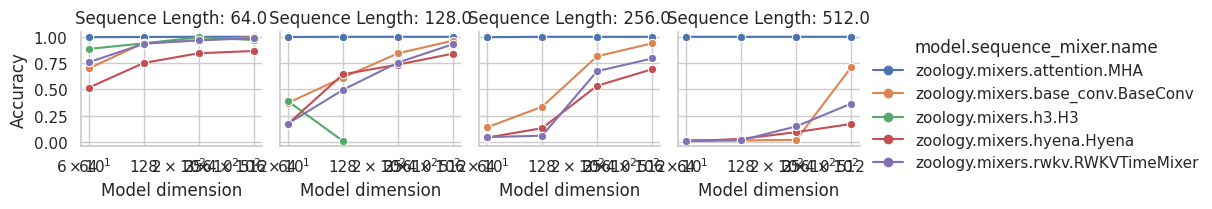

In [7]:
plot(df)

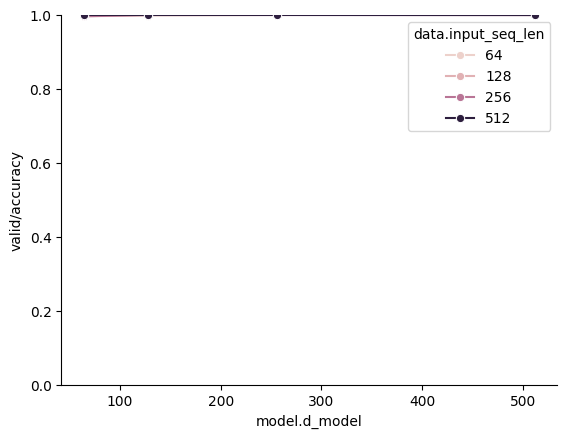

In [13]:
plot_df = df.groupby(
    [
        "model.d_model",
        "data.input_seq_len",
    ]
)["valid/accuracy"].max().reset_index()
sns.lineplot(
    data=plot_df,
    x="model.d_model",
    y="valid/accuracy",
    hue="data.input_seq_len",
    marker="o"
)
plt.ylim(0, 1)
sns.despine()

In [ ]:
df["model.sequence_mixer.name"]